In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score


def warn(*args, **kwargs):
    pass


warnings.warn = warn
warnings.filterwarnings('ignore')

In [85]:
car_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/exN-VGWhy9OjnXIevpKh5g/cars.csv')
car_df.head()


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [87]:
car_df.drop(['Car_ID'],axis=1)
car_df.isnull()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
def mlr_model_metrics(mlRegressor,Y_test_mlr,y_pred_mlr):
    msr=mean_squared_error(Y_test_mlr,y_pred_mlr)
    print("Root Mean Squared Error", math.sqrt(msr))
    var=r2_score(Y_test_mlr,y_pred_mlr)
    print("The Variance is \n",var)


Scatter 2D and 3D view of Car Price


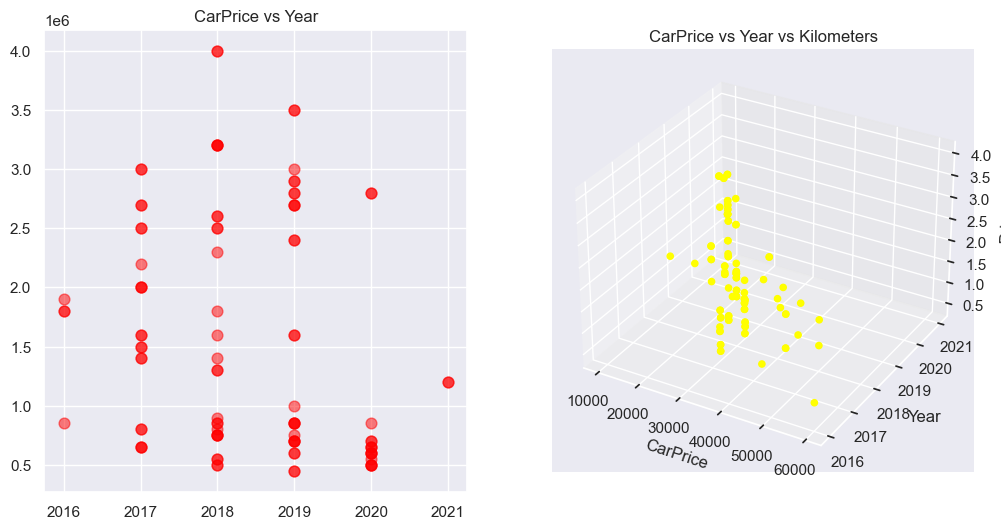

In [91]:
area=60
x=car_df["Year"]
y=car_df["Price"]
z=car_df["Kilometers_Driven"]

print("Scatter 2D and 3D view of Car Price")

fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,2,1)

ax.scatter(x,y,color="red",alpha=0.5,s=area)
ax.set_xlabel="Year"
ax.set_ylabel="Price"
plt.title("CarPrice vs Year")


ax=fig.add_subplot(1,2,2,projection="3d")
ax.scatter(z,x,y,color="yellow",alpha=1)
ax.set_ylabel('Year')
ax.set_zlabel('Price')
ax.set_xlabel('CarPrice')

plt.title("CarPrice vs Year vs Kilometers")
plt.show()

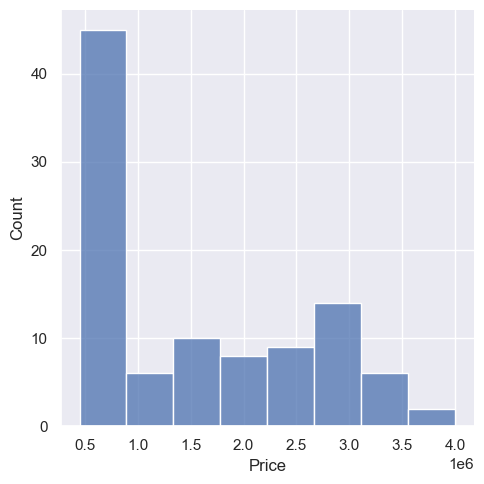

In [93]:
sns.set(rc={'figure.figsize':(10,8)})
np.random.seed(0)
sns.displot(car_df['Price'])
plt.show()

In [95]:


categorical_columns = car_df.select_dtypes(include='object').columns
numerical_columns = [col for col in car_df.select_dtypes(include=['float', 'int']).columns if col != 'Price']


categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])


preprocessorforallcolumns = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])


Features = car_df.drop(['Price'], axis=1)
label = np.log(car_df['Price'])


X_train, X_test_mlr, Y_train, Y_test_mlr = train_test_split(Features, label, random_state=0)


X_train = pd.DataFrame(X_train, columns=Features.columns)
X_test_mlr = pd.DataFrame(X_test_mlr, columns=Features.columns)

mlregressor = LinearRegression()


mlr = Pipeline(steps=[("preprocessingforall", preprocessorforallcolumns), ("mlr", mlregressor)])

mlr.fit(X_train, Y_train)


Y_pred_mlr = mlr.predict(X_test_mlr)


print(mlr)



Pipeline(steps=[('preprocessingforall',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['Car_ID', 'Year',
                                                   'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'Seats']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                         

In [71]:
print("The Intercept of Function is \n",mlregressor.intercept_)
print("The Coefficient of Function is \n",mlregressor.coef_)

The Intercept of Function is 
 14.010910805508585
The Coefficient of Function is 
 [ 2.68939525e-07 -1.02354679e-01 -1.19900692e-01 -1.78023602e-01
  3.46069406e-02  2.11560855e-01 -1.07779743e-02  2.49866388e-01
  3.46086140e-01 -8.90460686e-02 -5.98360824e-03 -2.15322453e-01
 -2.28131879e-01 -9.97040938e-02  1.88859397e-01 -9.03192116e-02
  1.18236160e-02 -6.81282277e-02  3.89484858e-02  1.95041448e-01
 -9.08323003e-02  2.06477020e-01  2.37217196e-01 -7.13076242e-02
 -3.94467331e-01  1.04358225e-01 -5.44918059e-02  1.80923691e-01
  2.64369387e-01  1.11873642e-02  3.59877793e-02  3.60282583e-03
  2.50995884e-01  3.17287816e-02  4.29690824e-02 -1.82416929e-01
  3.05427380e-02  1.96991396e-01 -1.36967262e-01  2.04740352e-01
  1.14118180e-01 -1.56106323e-01  1.81950676e-02  2.07599682e-02
 -1.58235507e-01 -1.31238613e-01  6.13766860e-02 -4.82482464e-02
  1.33156988e-02 -2.07143526e-01  1.28976085e-03 -2.96695489e-01
  1.02807515e-01  1.93645647e-02 -2.05945711e-01 -2.69753558e-01
  3.745

In [97]:
mlr_model_metrics(mlRegressor,Y_test_mlr,Y_pred_mlr)

Root Mean Squared Error 0.16416304508974613
The Variance is 
 0.9321832130417295
